# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import json
import requests
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#get today's date
today = datetime.datetime.now().strftime("%d/%m/%Y")

## Generate Cities List

In [99]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [78]:
#lists to store data
city_id_list = []
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = [] 
max_temp_list = [] 
wind_speed_list = []

#counter instead of using position in list (fix later)
i = 1
# Set url for API
url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval\n-----------------------------")

for city in cities:
    #search every result
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    search_result = requests.get(query_url).json()
    try: 
        #try if name can append
        city_append = city_list.append(search_result["name"])
        cloudiness = cloudiness_list.append(search_result["clouds"]["all"])
        country = country_list.append(search_result["sys"]["country"])
        date = date_list.append(search_result["dt"])
        humidity = humidity_list.append(search_result["main"]["humidity"]) 
        lat = lat_list.append(search_result["coord"]["lat"]) 
        lng = lng_list.append(search_result["coord"]["lon"]) 
        max_temp = max_temp_list.append(search_result["main"]["temp_max"]) 
        wind_speed = wind_speed_list.append(search_result["wind"]["speed"])
        city_id = city_id_list.append(i)
        print(f"Result {i}: {city}, successfully appended")
    except KeyError: 
        #print error message if name cannot append
        print(f"-----------------------------\nResult {i}: {city}, not found, moving to next result appended\n-----------------------------")
    
    i = i + 1
    
#inform of finished process
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
-----------------------------
Result 1: attawapiskat, not found, moving to next result appended
-----------------------------
Result 2: ponta do sol, successfully appended
Result 3: sao jose da coroa grande, successfully appended
Result 4: luderitz, successfully appended
Result 5: hithadhoo, successfully appended
Result 6: mataura, successfully appended
Result 7: albany, successfully appended
Result 8: rikitea, successfully appended
Result 9: hermanus, successfully appended
Result 10: ribeira grande, successfully appended
Result 11: bambous virieux, successfully appended
Result 12: prainha, successfully appended
Result 13: margate, successfully appended
Result 14: matara, successfully appended
Result 15: puerto rico, successfully appended
Result 16: ixtapa, successfully appended
Result 17: avarua, successfully appended
-----------------------------
Result 18: belushya guba, not found, moving to next result appended
----------------

Result 162: urumqi, successfully appended
Result 163: victoria, successfully appended
Result 164: chibombo, successfully appended
Result 165: saint-philippe, successfully appended
Result 166: constitucion, successfully appended
Result 167: fairbanks, successfully appended
Result 168: kununurra, successfully appended
Result 169: mehamn, successfully appended
Result 170: funtua, successfully appended
Result 171: mandalgovi, successfully appended
Result 172: filingue, successfully appended
Result 173: kodiak, successfully appended
Result 174: pierre, successfully appended
Result 175: sitka, successfully appended
Result 176: grand gaube, successfully appended
Result 177: zastavna, successfully appended
Result 178: burgeo, successfully appended
Result 179: elko, successfully appended
-----------------------------
Result 180: zhuozhou, not found, moving to next result appended
-----------------------------
Result 181: bilibino, successfully appended
Result 182: iquitos, successfully appended

Result 320: shelburne, successfully appended
Result 321: ardesen, successfully appended
Result 322: pecanha, successfully appended
Result 323: bolobo, successfully appended
Result 324: carsamba, successfully appended
Result 325: rayong, successfully appended
Result 326: balestrand, successfully appended
Result 327: pangkalanbuun, successfully appended
-----------------------------
Result 328: amderma, not found, moving to next result appended
-----------------------------
-----------------------------
Result 329: haibowan, not found, moving to next result appended
-----------------------------
Result 330: norwich, successfully appended
Result 331: zhob, successfully appended
Result 332: cherskiy, successfully appended
Result 333: kavieng, successfully appended
Result 334: siniscola, successfully appended
Result 335: taree, successfully appended
Result 336: orsha, successfully appended
Result 337: palmer, successfully appended
Result 338: san patricio, successfully appended
Result 339: 

Result 488: umm kaddadah, successfully appended
Result 489: sorland, successfully appended
Result 490: san pedro, successfully appended
Result 491: hamilton, successfully appended
-----------------------------
Result 492: toliary, not found, moving to next result appended
-----------------------------
Result 493: fethiye, successfully appended
Result 494: koson, successfully appended
-----------------------------
Result 495: samalaeulu, not found, moving to next result appended
-----------------------------
-----------------------------
Result 496: tawkar, not found, moving to next result appended
-----------------------------
Result 497: sept-iles, successfully appended
Result 498: noumea, successfully appended
Result 499: santa isabel, successfully appended
Result 500: bathsheba, successfully appended
Result 501: beruwala, successfully appended
Result 502: goundi, successfully appended
Result 503: champerico, successfully appended
-----------------------------
Result 504: lemesos, no

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [100]:
city_summary = pd.DataFrame({
    "City" : city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp" : max_temp_list,
    "Humidity" : humidity_list,   
    "Cloudiness": cloudiness_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list
})

#convert to celcius
#lambda takes the dataframe as value x and uses its max temp column to reutrn a value converted to celc
city_summary["Max Temp"] = city_summary.apply(lambda x: (x["Max Temp"]-32)*5/9,axis=1)

#export csv
city_summary.index.name='City ID'
city_summary.to_csv("../output_data/cities")

#display in dataframe
city_summary.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,Ponta do Sol,32.6667,-17.1000,146.938889,68,9,2.64,PT,1627425707
1,São José da Coroa Grande,-8.8978,-35.1478,147.194444,85,25,3.20,BR,1627425708
2,Lüderitz,-26.6481,15.1594,141.316667,74,0,4.38,NA,1627425708
3,Hithadhoo,-0.6000,73.0833,149.072222,78,97,3.48,MV,1627425708
4,Mataura,-46.1927,168.8643,139.677778,82,47,0.31,NZ,1627425708


In [80]:
#inspect data
city_summary.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,5.270000e+02
mean,19.822882,18.830528,145.765433,72.024668,54.586338,3.626736,1.627426e+09
std,32.651409,90.464978,4.389132,19.745273,38.502378,2.543296,6.439205e+01
min,-54.800000,-175.200000,134.638889,12.000000,0.000000,0.000000,1.627425e+09
25%,-6.005850,-60.722550,142.875000,62.500000,13.500000,1.760000,1.627426e+09
50%,22.890900,21.548200,146.461111,75.000000,66.000000,3.090000,1.627426e+09
75%,45.391850,97.932200,148.925000,87.000000,92.000000,5.140000,1.627426e+09
max,78.218600,179.316700,157.588889,100.000000,100.000000,18.930000,1.627426e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [81]:
#removes data
city_weather_df = city_summary[city_summary["Humidity"] <= 100]

#checks no humidity over 100 to ensure functioning properly
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,5.270000e+02
mean,19.822882,18.830528,145.765433,72.024668,54.586338,3.626736,1.627426e+09
std,32.651409,90.464978,4.389132,19.745273,38.502378,2.543296,6.439205e+01
min,-54.800000,-175.200000,134.638889,12.000000,0.000000,0.000000,1.627425e+09
25%,-6.005850,-60.722550,142.875000,62.500000,13.500000,1.760000,1.627426e+09
50%,22.890900,21.548200,146.461111,75.000000,66.000000,3.090000,1.627426e+09
75%,45.391850,97.932200,148.925000,87.000000,92.000000,5.140000,1.627426e+09
max,78.218600,179.316700,157.588889,100.000000,100.000000,18.930000,1.627426e+09


In [82]:
#  gathers all removed data
humid_over_100 =  city_summary[city_summary["Humidity"] > 100]


# shows all removed data
humid_over_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

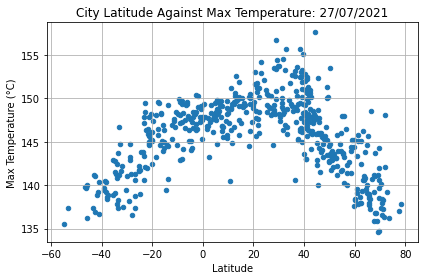

In [83]:
ax = city_weather_df.plot(kind="scatter", x="Lat", y="Max Temp")
plt.title(f"City Latitude Against Max Temperature: {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.tight_layout()
plt.grid()

ax.figure.savefig("../output_data/fig1")

This plot models the relationship between the distance from the equator and the max tempurature of a country.

We can see countries closer to the eqautor have higher max tempuratures. As the Earth is closest to the sun at the equator. Temperatures decrease sharply as latitud deviates from 0. 

## Latitude vs. Humidity Plot

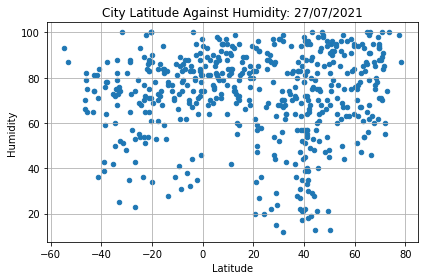

In [84]:
ax = city_weather_df.plot(kind="scatter", x="Lat", y="Humidity")
plt.title(f"City Latitude Against Humidity: {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.grid()

ax.figure.savefig("../output_data/fig2")

There is not a strong correlation between latitude and humidity. However we can observe a potential spike in humidity closer to the equator (due to the higher max tempurature). In our sample, it is more likely for a city to have a higher humidty. 

## Latitude vs. Cloudiness Plot

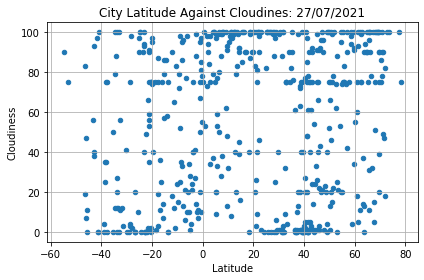

In [85]:
ax = city_weather_df.plot(kind="scatter", x="Lat", y="Cloudiness")
plt.title(f"City Latitude Against Cloudines: {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.grid()

ax.figure.savefig("../output_data/fig3")

We can see in our data the cities gravitate towards high or low levels of cloudiness. Although this does not seem to be affected by latitude, it is noteable that cities fall towards more absolute levels of cloudiness. 

## Latitude vs. Wind Speed Plot

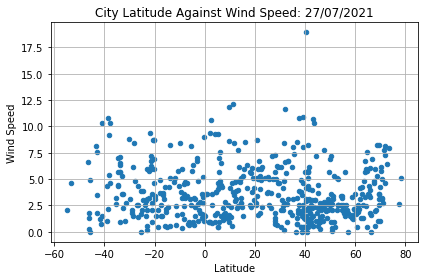

In [86]:
ax = city_weather_df.plot(kind="scatter", x="Lat", y="Wind Speed")
plt.title(f"City Latitude Against Wind Speed: {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.tight_layout()
plt.grid()

ax.figure.savefig("../output_data/fig4")

We can see a small, albeit not very significant trend between moving away from the southern hemisphere and a decrease in wind speeds for a city.

## Linear Regression

In [87]:
north_hem_df = city_weather_df[city_weather_df["Lat"] >= 0]
south_hem_df = city_weather_df[city_weather_df["Lat"] < 0]

x_axis = "Lat"
y_axes = ["Max Temp","Humidity","Cloudiness","Wind Speed"]
line_regress_dict = {}
south_dict = {}
slope_dict = {} 
intercept_dict = {}

for y_axis in y_axes:
    x_values = north_hem_df["Lat"]
    y_values = north_hem_df[y_axis]
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_regress_dict["North {0}".format(y_axis)] = regress_values
    slope_dict["North {0}".format(y_axis)] = slope
    intercept_dict["North {0}".format(y_axis)] = intercept
    
    x_values = south_hem_df["Lat"]
    y_values = south_hem_df[y_axis]
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_regress_dict["South {0}".format(y_axis)] = regress_values
    slope_dict["South {0}".format(y_axis)] = slope
    intercept_dict["South {0}".format(y_axis)] = intercept
    
intercept_dict

{'North Max Temp': 151.74728962586195,
 'South Max Temp': 148.81551528645272,
 'North Humidity': 72.87883676112644,
 'South Humidity': 74.02702373487536,
 'North Cloudiness': 64.18159532699752,
 'South Cloudiness': 48.77060566557348,
 'North Wind Speed': 4.009070540136242,
 'South Wind Speed': 3.165142355985933}

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

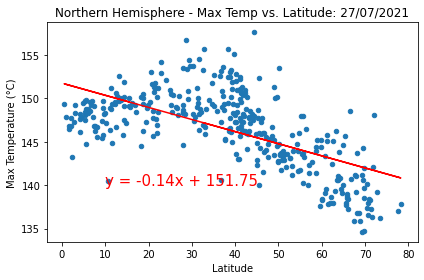

In [88]:
north_hem_df.plot(kind="scatter", x="Lat", y="Max Temp")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.plot(north_hem_df["Lat"],line_regress_dict["North Max Temp"],"r-")
line_eq = "y = " + str(round(slope_dict["North Max Temp"],2)) + "x + " + str(round(intercept_dict["North Max Temp"],2))
plt.annotate(line_eq,(10,140),fontsize=15,color="red")
plt.tight_layout()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

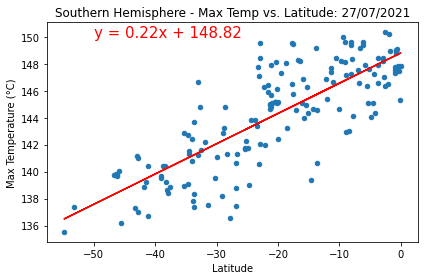

In [89]:
south_hem_df.plot(kind="scatter", x="Lat", y="Max Temp")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.plot(south_hem_df["Lat"],line_regress_dict["South Max Temp"],"r-")
line_eq = "y = " + str(round(slope_dict["South Max Temp"],2)) + "x + " + str(round(intercept_dict["South Max Temp"],2))
plt.annotate(line_eq,(-50,150),fontsize=15,color="red")
plt.tight_layout()


We can see on each plot, as we lattitude gets closer to zero, the max tempurature increases. These plots show us that moving away from the equate will lead to lower maximum temperatures.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

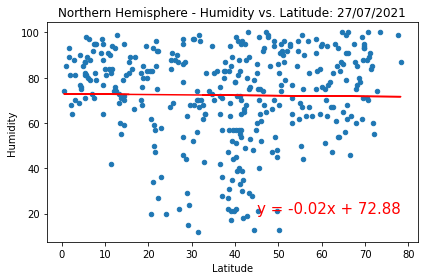

In [90]:
north_hem_df.plot(kind="scatter", x="Lat", y="Humidity")
plt.title(f"Northern Hemisphere - Humidity vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(north_hem_df["Lat"],line_regress_dict["North Humidity"],"r-")
line_eq = "y = " + str(round(slope_dict["North Humidity"],2)) + "x + " + str(round(intercept_dict["North Humidity"],2))
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.tight_layout()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

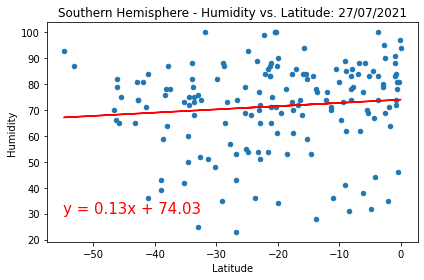

In [91]:
south_hem_df.plot(kind="scatter", x="Lat", y="Humidity")
plt.title(f"Southern Hemisphere - Humidity vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(south_hem_df["Lat"],line_regress_dict["South Humidity"],"r-")
line_eq = "y = " + str(round(slope_dict["South Humidity"],2)) + "x + " + str(round(intercept_dict["South Humidity"],2))
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.tight_layout()


We can observe that both plotsshow a weak correlation away from 0 latitude. This is not significant enough to directly associate with the latitude, but does show consitenct in behaviour between the two hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

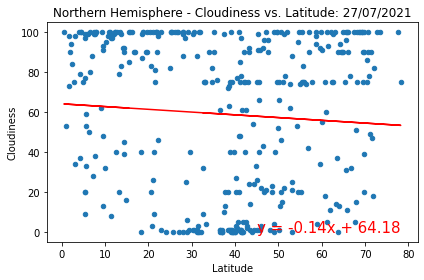

In [92]:
north_hem_df.plot(kind="scatter", x="Lat", y="Cloudiness")
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(north_hem_df["Lat"],line_regress_dict["North Cloudiness"],"r-")
line_eq = "y = " + str(round(slope_dict["North Cloudiness"],2)) + "x + " + str(round(intercept_dict["North Cloudiness"],2))
plt.annotate(line_eq,(45,0),fontsize=15,color="red")
plt.tight_layout()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

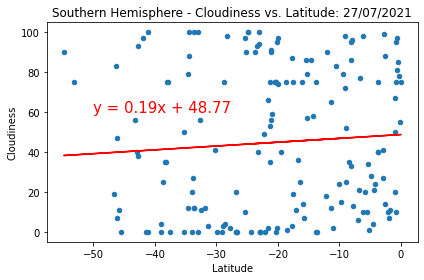

In [93]:
south_hem_df.plot(kind="scatter", x="Lat", y="Cloudiness")
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(south_hem_df["Lat"],line_regress_dict["South Cloudiness"],"r-")
line_eq = "y = " + str(round(slope_dict["South Cloudiness"],2)) + "x + " + str(round(intercept_dict["South Cloudiness"],2))
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.tight_layout()

Across both plots we can see a correlation between deviating from the equator and an increase in cloudiness. This can be explained and supported by the higher max temperatures closer to 0 latitude. Warmer cities are more likely to experience less rain and consequently, less clouds.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

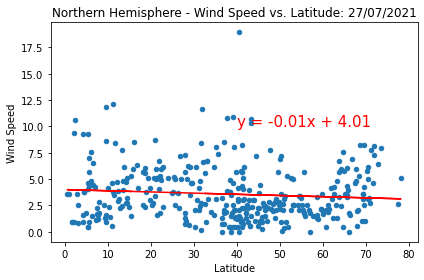

In [94]:
north_hem_df.plot(kind="scatter", x="Lat", y="Wind Speed")
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(north_hem_df["Lat"],line_regress_dict["North Wind Speed"],"r-")
line_eq = "y = " + str(round(slope_dict["North Wind Speed"],2)) + "x + " + str(round(intercept_dict["North Wind Speed"],2))
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.tight_layout()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

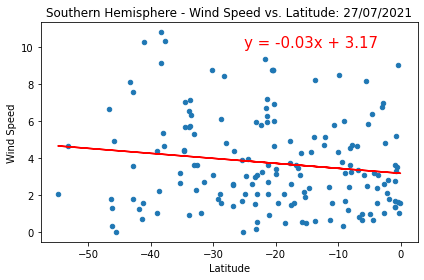

In [95]:
south_hem_df.plot(kind="scatter", x="Lat", y="Wind Speed")
plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(south_hem_df["Lat"],line_regress_dict["South Wind Speed"],"r-")
line_eq = "y = " + str(round(slope_dict["South Wind Speed"],2)) + "x + " + str(round(intercept_dict["South Wind Speed"],2))
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.tight_layout()

There is a moderate negative correlation in the southern hemisphere, showing a clear decrease in temperatures as we approach 0 latitude. However, this trend is much weaker with the northern hemisphere. As we deviate from the equator, wind speeds do continue to decrease as strongly as with in the lower hemisphere.